## Load Data from CSVs

In [1]:
import unicodecsv

def read_csv(filename) -> list:
    with open(filename, 'rb') as csvfile:
        reader = unicodecsv.DictReader(csvfile)
        return list(reader)


In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

files = ['../data/enrollments.csv', '../data/daily_engagement.csv', '../data/project_submissions.csv']

enrollments = read_csv(files[0])
daily_engagement = read_csv(files[1])
project_submissions = read_csv(files[2])


In [3]:
print(enrollments[0])
print()
print(daily_engagement[0])
print()
print(project_submissions[0])
print()

OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', '2014-11-10'), ('cancel_date', '2015-01-14'), ('days_to_cancel', '65'), ('is_udacity', 'True'), ('is_canceled', 'True')])

OrderedDict([('acct', '0'), ('utc_date', '2015-01-09'), ('num_courses_visited', '1.0'), ('total_minutes_visited', '11.6793745'), ('lessons_completed', '0.0'), ('projects_completed', '0.0')])

OrderedDict([('creation_date', '2015-01-14'), ('completion_date', '2015-01-16'), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])



## Fixing Data Types

In [4]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.fromisoformat(date)
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [5]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [6]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

## Problems in the Data

In [7]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

for entry in daily_engagement:
    entry['account_key'] = entry.pop('acct')
    
print(daily_engagement[0]['account_key'])

0


## Investigating the Data

In [8]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

def unique_students(dataset):
    unique_students = set()
    for entry in dataset:
        unique_students.add(entry['account_key'])
    return unique_students


datasets = [enrollments, daily_engagement, project_submissions]
stats = []

for dataset in datasets:
    stats.append((len(unique_students(dataset)), len(dataset)))

print(stats)

[(1302, 1640), (1237, 136240), (743, 3642)]


## Missing Engagement Records

In [9]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

students_not_engaging = list(unique_students(enrollments).difference(unique_students(daily_engagement)))

print('Students not engaging:\n', students_not_engaging, '\n')

first = students_not_engaging[0]
print("Sample student account key =", first)

for entry in enrollments:
    if entry['account_key'] == first:
        print(entry)

Students not engaging:
 ['968', '871', '1241', '1120', '707', '1063', '739', '664', '803', '841', '766', '749', '889', '997', '1079', '819', '1145', '1069', '789', '1237', '1191', '1025', '1186', '727', '725', '996', '1086', '817', '875', '1010', '799', '914', '1238', '1171', '878', '981', '884', '1273', '1190', '733', '1291', '926', '1101', '1222', '1219', '737', '870', '1218', '1155', '711', '1213', '717', '1148', '1284', '728', '1125', '902', '1044', '1270', '750', '1304', '1129', '802', '964', '654'] 

Sample student account key = 968
OrderedDict([('account_key', '968'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 7, 17, 0, 0)), ('cancel_date', datetime.datetime(2015, 7, 17, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])


## Checking for More Problem Records

In [10]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

students_not_engaging = set(students_not_engaging)

for entry in enrollments:
    students_not_cancelled_within_same_day = [entry for entry in enrollments 
                                        if entry['account_key'] in students_not_engaging and entry['days_to_cancel'] != 0]

for student in students_not_cancelled_within_same_day:
    print(student, '\n')
    

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)]) 

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)]) 

OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)]) 



## Tracking Down the Remaining Problems

In [11]:
# Create a set of the account keys for all Udacity test accounts

udacity_test_accounts = set()

for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])

len(udacity_test_accounts)

6

In [12]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts

def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [13]:
# Remove Udacity test accounts from all three tables

non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))
print(non_udacity_enrollments[1])

1622
135656
3634
OrderedDict([('account_key', '429'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 120), ('is_udacity', False), ('is_canceled', True)])


## Refining the Question

In [36]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = dict()
for student in non_udacity_enrollments:
    if student['days_to_cancel'] is None or student['days_to_cancel'] > 7:
        join_date = paid_students.get(student['account_key'])
        if join_date is None or student['join_date'] > join_date:
            paid_students[student['account_key']] = student['join_date']

print(paid_students['69'])
print(len(paid_students))


2015-03-10 00:00:00
995


## Getting Data from First Week

In [44]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.

def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days >= 0 and time_delta.days < 7


In [51]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []

for record in non_udacity_engagement:
    account = record['account_key']
    if account in paid_students:
        join_date = paid_students[account]
        engagement_date = record['utc_date']
        if within_one_week(join_date, engagement_date):
            paid_engagement_in_first_week.append(record)

print(len(paid_engagement_in_first_week))

6919


## Exploring Student Engagement

In [57]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.

engagement_by_account = defaultdict(list)

for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)


In [59]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)

total_minutes_by_account = {}

for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes


In [60]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = list(total_minutes_by_account.values())

print('Mean:', np.mean(total_minutes))
print('Standard deviation:', np.std(total_minutes))
print('Minimum:', np.min(total_minutes))
print('Maximum:', np.max(total_minutes))

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


## Debugging Data Analysis Code

In [ ]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

## Lessons Completed in First Week

In [99]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

def stats_by_key(data: dict, key: str):
    totals = []
    for account, engagements in data.items():
        total = 0
        for engagement in engagements:
            total += engagement[key]
        totals.append(total)
    return np.mean(totals), np.std(totals), np.min(totals), np.max(totals)

print(stats_by_key(engagement_by_account, 'lessons_completed'))
print(stats_by_key(engagement_by_account, 'total_minutes_visited'))

(1.636180904522613, 3.002561299829423, 0, 36)
(306.70832675342825, 412.99693340852957, 0.0, 3564.7332644989997)


## Number of Visits in First Week

In [72]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

def visit_stats():
    visits = []
    for account, engagements in engagement_by_account.items():
        total = 0
        for engagement in engagements:
            if engagement['total_minutes_visited'] > 0:
                total += 1
        visits.append(total)
    return np.mean(visits), np.std(visits), np.min(visits), np.max(visits)

print(visit_stats())

(2.8673366834170855, 2.2551980029196814, 0, 7)


## Splitting out Passing Students

In [94]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

paid_submissions = []

for record in non_udacity_submissions:
    account = record['account_key']
    if account in paid_students:
        paid_submissions.append(record)

print(paid_submissions[0])


OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)), ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])


In [98]:
subway_project_lesson_keys = ['746169184', '3176718735']

students_passed = set()

for submission in paid_submissions:
    account = submission['account_key']
    lesson = submission['lesson_key']
    result = submission['assigned_rating']
    if lesson in subway_project_lesson_keys and (result == 'PASSED' or result == 'DISTINCTION'):
        students_passed.add(account)

non_passing_engagement = []
passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    if account_key in students_passed:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


## Comparing the Two Student Groups

In [132]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

engagement_by_account_passed = dict()
engagement_by_account_not_passed = dict()

for account, entry in engagement_by_account.items():
    if account in students_passed:
        engagement_by_account_passed[account] = entry
    else:
        engagement_by_account_not_passed[account] = entry
        
visits_passed = []
for account, engagements in engagement_by_account_passed.items():
    total = 0
    for engagement in engagements:
        if engagement['total_minutes_visited'] > 0:
            total += 1
    visits_passed.append(total)

visits_not_passed = []
for account, engagements in engagement_by_account_not_passed.items():
    total = 0
    for engagement in engagements:
        if engagement['total_minutes_visited'] > 0:
            total += 1
    visits_not_passed.append(total)


print('STUDENTS WHO PASSED THE SUBWAY PROJECT:')        
print('Lessons:', stats_by_key(engagement_by_account_passed, 'lessons_completed'))
print('Total minutes:', stats_by_key(engagement_by_account_passed, 'total_minutes_visited'))
print("Visits:", np.mean(visits_passed), np.std(visits_passed), np.min(visits_passed), np.max(visits_passed))

print()
print("STUDENTS WHO DIDN'T PASS THE SUBWAY PROJECT:")   
print('Lessons:', stats_by_key(engagement_by_account_not_passed, 'lessons_completed'))
print('Total minutes:', stats_by_key(engagement_by_account_not_passed, 'total_minutes_visited'))
print("Visits:", np.mean(visits_not_passed), np.std(visits_not_passed), 
      np.min(visits_not_passed), np.max(visits_not_passed))
    

STUDENTS WHO PASSED THE SUBWAY PROJECT:
Lessons: (2.052550231839258, 3.1422270555779344, 0, 36)
Total minutes: (394.58604648350865, 448.4995193265521, 0.0, 3564.7332644989997)
Visits: 3.384853168469861 2.2588214709184595 0 7

STUDENTS WHO DIDN'T PASS THE SUBWAY PROJECT:
Lessons: (0.8620689655172413, 2.5491599418312028, 0, 27)
Total minutes: (143.32647426675584, 269.5386190114951, 0.0, 1768.5227493319999)
Visits: 1.9051724137931034 1.9057314413619046 0 7


## Making Histograms

(array([[ 87.,  82.,  79.,  91.,  77.,  85., 146.],
        [ 97.,  90.,  56.,  41.,  15.,  24.,  25.]]),
 array([0, 1, 2, 3, 4, 5, 6, 7]),
 <a list of 2 BarContainer objects>)

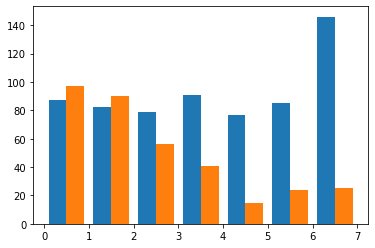

In [164]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

from matplotlib import pyplot as plt
import seaborn as sns

bins = np.arange(8)
plt.hist([visits_passed, visits_not_passed], bins)

In [155]:
def totals_by_key(data: dict, key: str):
    totals = []
    for entry in data.values():
        total = 0
        for record in entry:
            total += record[key]
        totals.append(total)
    return totals


(array([[370., 155.,  83.,  19.,  10.,   4.,   2.,   3.,   0.,   1.],
        [307.,  25.,   8.,   6.,   2.,   0.,   0.,   0.,   0.,   0.]]),
 array([   0.        ,  356.47332645,  712.9466529 , 1069.41997935,
        1425.8933058 , 1782.36663225, 2138.8399587 , 2495.31328515,
        2851.7866116 , 3208.25993805, 3564.7332645 ]),
 <a list of 2 BarContainer objects>)

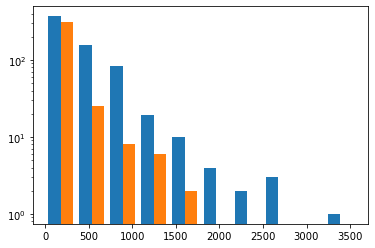

In [156]:
minutes_passed = totals_by_key(engagement_by_account_passed, 'total_minutes_visited')
minutes_not_passed = totals_by_key(engagement_by_account_not_passed, 'total_minutes_visited')
        
plt.hist([minutes_passed, minutes_not_passed], log=True)

(array([[516.,  97.,  23.,   4.,   3.,   3.,   0.,   0.,   0.,   1.],
        [325.,  13.,   6.,   1.,   1.,   1.,   0.,   1.,   0.,   0.]]),
 array([ 0. ,  3.6,  7.2, 10.8, 14.4, 18. , 21.6, 25.2, 28.8, 32.4, 36. ]),
 <a list of 2 BarContainer objects>)

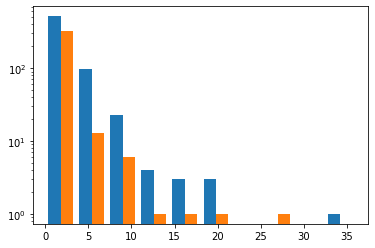

In [157]:
lessons_passed = totals_by_key(engagement_by_account_passed, 'lessons_completed')
lessons_not_passed = totals_by_key(engagement_by_account_not_passed, 'lessons_completed')
        
plt.hist([lessons_passed, lessons_not_passed], log=True)

## Improving Plots and Sharing Findings

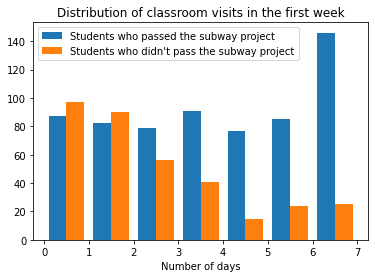

In [165]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

bins = np.arange(8)
plt.xlabel("Number of days")
plt.title("Distribution of classroom visits in the first week")
plt.hist([visits_passed, visits_not_passed], bins, label=["Students who passed the subway project", "Students who didn't pass the subway project"])
plt.legend(loc="upper left")